In [88]:
import os
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get the Data

#### Load the Data

In [89]:
DATASET_NAME = "diamonds" 
DATASET_DIR = "data"
UNPACKED_DIR = os.path.join("data", "unpacked")

In [90]:
os.makedirs(UNPACKED_DIR, exist_ok=True)
tgz_path = os.path.join(DATASET_DIR, DATASET_NAME + ".tgz")
dataset_tgz = tarfile.open(tgz_path)
dataset_tgz.extractall(path=UNPACKED_DIR)
dataset_tgz.close()

In [91]:
csv_path = os.path.join(UNPACKED_DIR, DATASET_NAME + ".csv")
housing = pd.read_csv(csv_path)

#### Take a Quick Look at the Data Structure

In [92]:
housing.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [93]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [94]:
housing["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [95]:
housing["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [96]:
housing["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [97]:
housing.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [98]:
housing.drop("Unnamed: 0", axis=1, inplace=True)

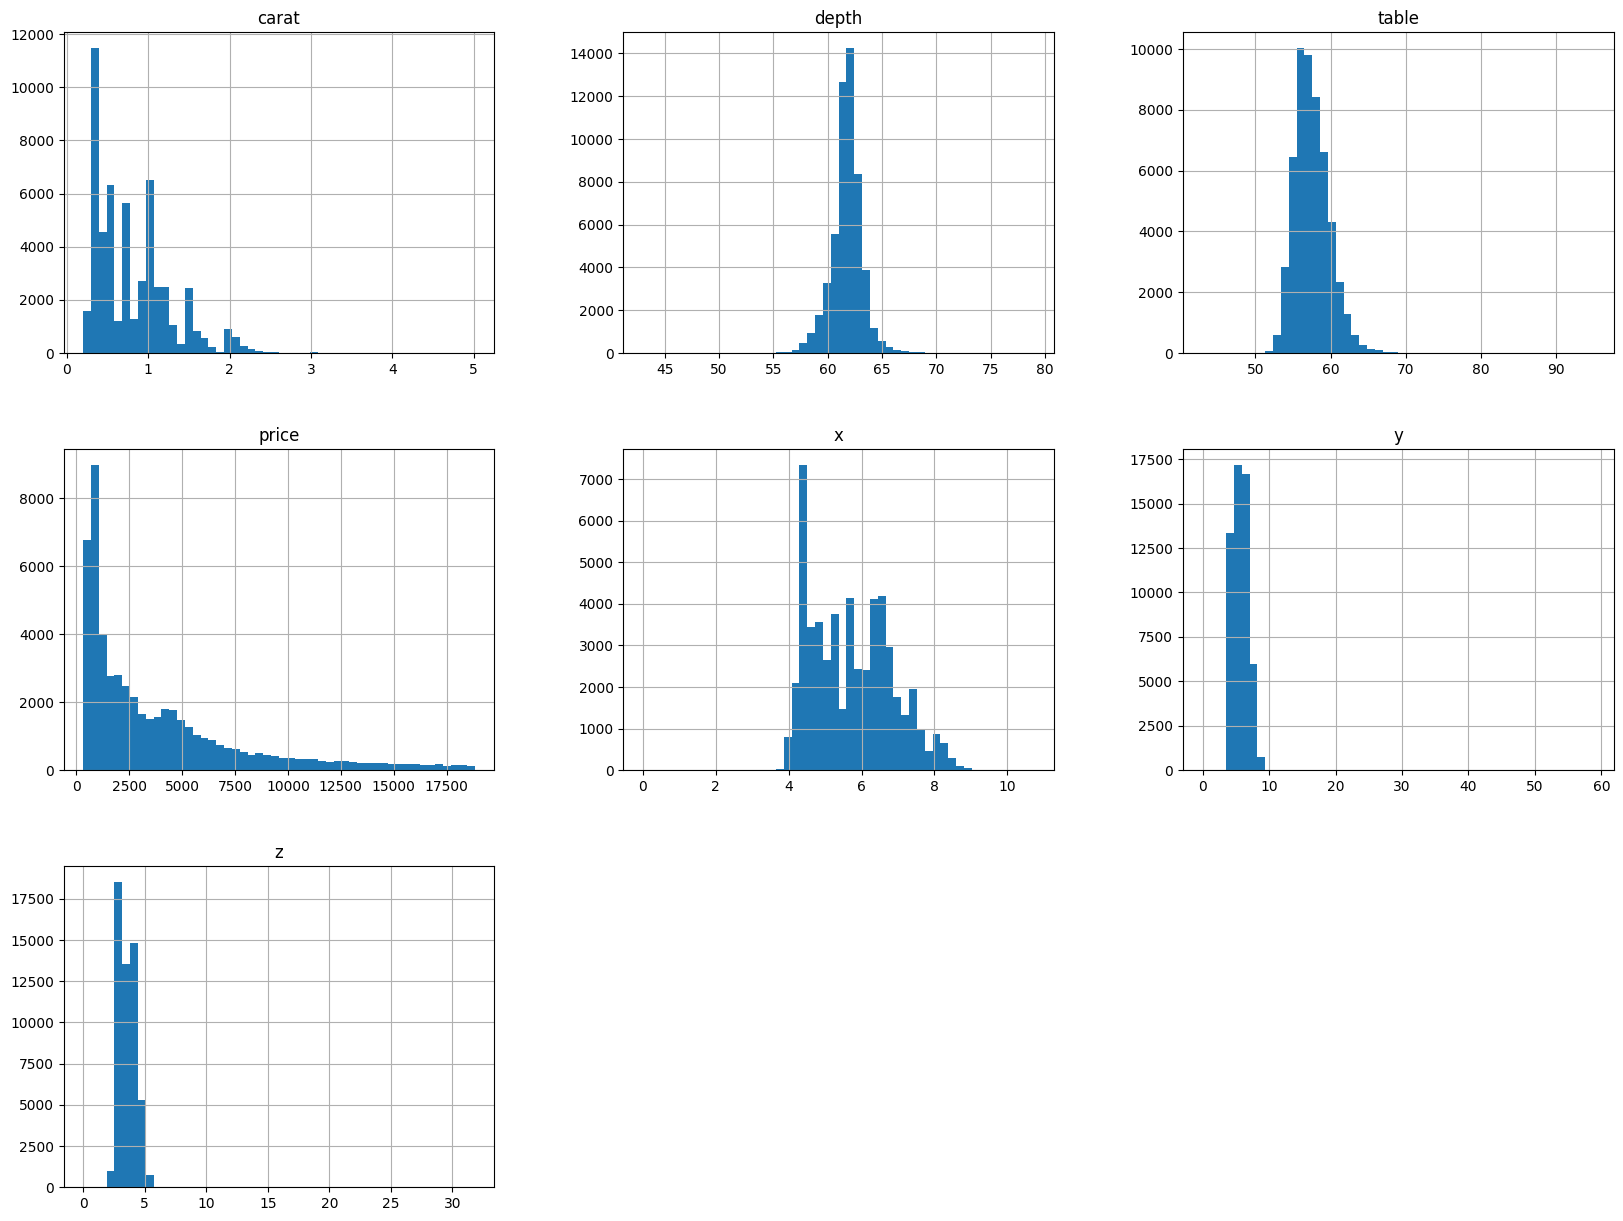

In [99]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

#### Create a Test Set

In [100]:
housing["carat_cat"] = pd.cut(housing["carat"], bins=[0., 1., 2., 3., 4., np.inf], labels=[1, 2, 3, 4, 5])
housing["carat_cat"].value_counts()

carat_cat
1    36438
2    15613
3     1857
4       27
5        5
Name: count, dtype: int64

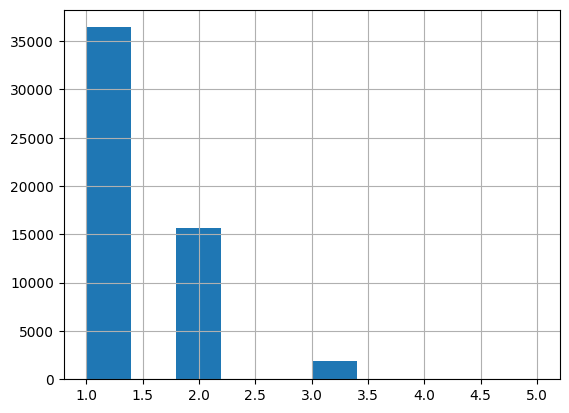

In [101]:
housing["carat_cat"].hist();

In [102]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(split.split(housing, housing["carat_cat"]))
strat_train_set = housing.loc[train_index]
strat_test_set = housing.loc[test_index]
strat_test_set["carat_cat"].value_counts() / len(strat_test_set)

carat_cat
1    0.675565
2    0.289488
3    0.034390
4    0.000463
5    0.000093
Name: count, dtype: float64

In [103]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("carat_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [104]:
housing = strat_train_set.copy()

#### Looking for Correlations

In [131]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.921097
x        0.883972
y        0.859818
z        0.857093
table    0.129666
depth   -0.013416
Name: price, dtype: float64

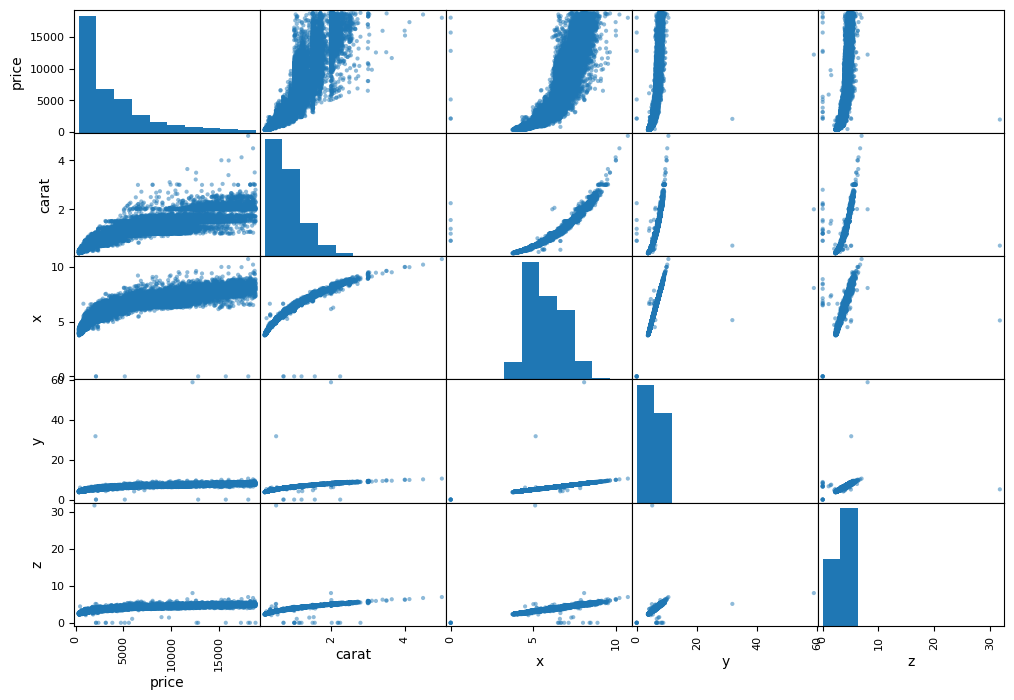

In [133]:
from pandas.plotting import scatter_matrix

attributes = ["price", "carat", "x", "y", "z"]
scatter_matrix(housing[attributes], figsize=(12, 8));

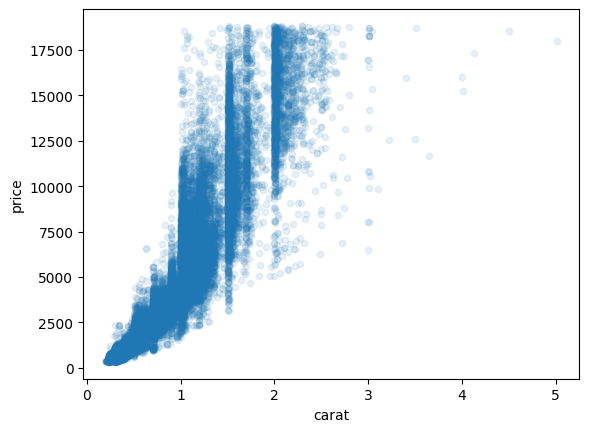

In [134]:
housing.plot(kind="scatter", x="carat", y="price", alpha=0.1);

#### Experimenting with Attribute Combinations

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]   # TODO
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

## Prepare the Data for Machine Learning Algorithms

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Data Cleaning

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

In [ ]:
housing_num.median().values

In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

#### Handling Text and Categorical Attributes

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
housing_cat_1hot.toarray()

In [ ]:
cat_encoder.categories_

#### Custom Transformers

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### Transformation Pipelines (with Feature Scaling)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), 
    ("attribs_adder", CombinedAttributesAdder()), 
    ("std_scaler", StandardScaler())
], verbose=True)

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr[0]

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(categories=cat_encoder.categories_), cat_attribs)
], verbose=True)

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared[0]

In [ ]:
housing_prepared.shape

## Select and Train a Model

#### Training and Evaluating on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("Predictions:", lin_reg.predict(some_data_prepared))

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
from sklearn.metrics import root_mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

#### Better Evaluation Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_root_mean_squared_error",
                         n_jobs=-1, pre_dispatch="2*n_jobs")
tree_rmse_scores = -scores

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_root_mean_squared_error",
                             n_jobs=-1, pre_dispatch="2*n_jobs")
lin_rmse_scores = -lin_scores
display_scores(lin_rmse_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=10, scoring="neg_root_mean_squared_error",
                                n_jobs=-1, pre_dispatch="2*n_jobs")
forest_rmse_scores = -forest_scores
display_scores(forest_rmse_scores)

## Fine-Tune Your Model

#### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True,
                           n_jobs=-1, verbose=2, pre_dispatch="2*n_jobs")
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search_rmse = -grid_search.best_score_
grid_search_rmse

In [106]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

NameError: name 'grid_search' is not defined

#### Analyze the Best Models and Their Errors

In [107]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

NameError: name 'grid_search' is not defined

In [108]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
feature_importance_tuples = sorted(zip(feature_importances, attributes), reverse=True)
feature_importance_tuples

NameError: name 'full_pipeline' is not defined

#### Evaluate Your System on the Test Set

In [109]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

NameError: name 'grid_search' is not defined

In [110]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

NameError: name 'final_predictions' is not defined

## Exercises

#### 1.
Try a Support Vector Machine regressor (```sklearn.svm.SVR```) with various hyperparameters, such as ```kernel="linear"``` (with various values for the ```C``` hyperparameter) or ```kernel="rbf"``` (with various values for the ```C``` and ```gamma``` hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best ```SVR``` predictor perform?

In [111]:
from sklearn.svm import SVR

param_grid = [
    {"kernel": ["linear"], "C": [128, 256, 512, 1024]},
    {"kernel": ["rbf"], "C": [128, 256, 512, 1024], "gamma": [0.1, 0.5, 1, 2]}
]

svr_reg = SVR()
grid_search_svr = GridSearchCV(svr_reg, param_grid, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True, 
                               n_jobs=-1, verbose=2, pre_dispatch="2*n_jobs")
grid_search_svr.fit(housing_prepared, housing_labels)

NameError: name 'housing_prepared' is not defined

In [112]:
grid_search_svr.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [113]:
grid_search_svr.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [114]:
grid_search_svr_rmse = -grid_search_svr.best_score_
grid_search_svr_rmse

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

#### 2.
Try replacing ```GridSearchCV``` with ```RandomizedSearchCV```.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_rand = {
    "kernel": ["linear", "rbf"],
    "C": uniform(0, 1000),
    "gamma": uniform(0, 10)
}

svr_reg = SVR()
n_iter = 20
rand_search = RandomizedSearchCV(svr_reg, param_rand, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True, 
                                 n_jobs=-1, verbose=2, pre_dispatch="2*n_jobs", n_iter=n_iter, random_state=42)
rand_search.fit(housing_prepared, housing_labels)

In [115]:
rand_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [116]:
rand_search.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [117]:
rand_search_rmse = -rand_search.best_score_
rand_search_rmse

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

#### 3. 
Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [118]:
class AttributesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribs_n):
        self.attribs_n = attribs_n
        self.feature_importances = None
        self.attribs_list = None
    def fit(self, X, y=None):
        self.feature_importances = feature_importances # ... calculate feature_importances based on X here
        self.attribs_list = sorted(np.argsort(self.feature_importances)[-self.attribs_n:])
        return self
    def transform(self, X, y=None):
        return X[:, self.attribs_list]

NameError: name 'BaseEstimator' is not defined

In [119]:
attribs_n = 50
full_select_pipeline = Pipeline([
    ("full", full_pipeline),
    ("select", AttributesSelector(attribs_n))
], verbose=True)

housing_selector_prepared = full_select_pipeline.fit_transform(housing)
housing_selector_prepared[0]

NameError: name 'Pipeline' is not defined

In [120]:
[feature for feature in feature_importance_tuples[:attribs_n]]

NameError: name 'feature_importance_tuples' is not defined

In [121]:
important_features_indices = sorted(np.argsort(feature_importances)[-attribs_n:])
important_features_indices

NameError: name 'feature_importances' is not defined

In [122]:
np.all(housing_selector_prepared == housing_prepared[:, important_features_indices])

NameError: name 'housing_selector_prepared' is not defined

#### 4. 
Try creating a single pipeline that does the full data preparation plus the final prediction.

In [123]:
full_select_predict_pipeline = Pipeline([
    ("full_select", full_select_pipeline),
    ("predict", final_model)
], verbose=True)

full_select_predict_pipeline.fit(housing, housing_labels)

NameError: name 'Pipeline' is not defined

In [124]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

NameError: name 'housing_labels' is not defined

In [125]:
print("Predictions:", full_select_predict_pipeline.predict(some_data))

NameError: name 'full_select_predict_pipeline' is not defined

In [126]:
print("Labels:", list(some_labels))

NameError: name 'some_labels' is not defined

#### 5. 
Automatically explore some preparation options using GridSearchCV.

In [127]:
param_grid = [{
    "full_select__full__num__imputer__strategy": ["mean", "median", "most_frequent"],
    "full_select__select__attribs_n": list(range(1, len(attributes) + 1))
}]

grid_search_prep = GridSearchCV(full_select_predict_pipeline, param_grid, cv=5, scoring="neg_root_mean_squared_error", 
                                return_train_score=True, n_jobs=-1, verbose=2, pre_dispatch="2*n_jobs")
grid_search_prep.fit(housing, housing_labels)

NameError: name 'attributes' is not defined

In [128]:
grid_search_prep.best_params_

NameError: name 'grid_search_prep' is not defined

In [129]:
grid_search_prep.best_estimator_

NameError: name 'grid_search_prep' is not defined

In [130]:
grid_search_prep_rmse = -grid_search_prep.best_score_
grid_search_prep_rmse

NameError: name 'grid_search_prep' is not defined